# Assignment 2 - Data Preprocessing

- Deadline: Thursday, 20.11.2024
- Data Source: https://www.kaggle.com/datasets/jacopoferretti/wages-and-education-of-young-males-dataset/data

In this assignment, you will preprocess and clean a dataset by handling missing values, correcting inconsistencies, normalizing or encoding features, and removing outliers to prepare it for analysis or modeling. The expected result is a clean, structured dataset ready for further analysis or machine learning.

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [66]:
# loading data from CSV file
df = pd.read_csv('../Data/Lab2/Males.csv')

In [67]:
# veiwing first 5 rows of data 
df.head()

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1,13,1980,14,1,no,other,no,no,1.197540,Business_and_Repair_Service,Service_Workers,north_east
1,2,13,1981,14,2,yes,other,no,no,1.853060,Personal_Service,Service_Workers,north_east
2,3,13,1982,14,3,no,other,no,no,1.344462,Business_and_Repair_Service,Service_Workers,north_east
3,4,13,1983,14,4,no,other,no,no,1.433213,Business_and_Repair_Service,Service_Workers,north_east
4,5,13,1984,14,5,no,other,no,no,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east


In [68]:
# label encoding the categorical columns
columns = ["union", "ethn","maried","health", "industry", "occupation"]

label_encoders = {col: LabelEncoder() for col in columns}

for col in columns:
    df[col] = label_encoders[col].fit_transform(df[col])

In [69]:
# droppiong the unnecessary columns
df = df.drop(columns= ["rownames", "nr"], axis=1)

In [70]:
# replacing the values of residence column with the numercial values
df["residence"] = df["residence"].map({"south": 1, "nothern_central": 2, "north_east": 3, "rural_area": 4})
df.head()


,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1980,14,1,0,2,0,0,1.197540,1,8,3.0
1,1981,14,2,1,2,0,0,1.853060,7,8,3.0
2,1982,14,3,0,2,0,0,1.344462,1,8,3.0
3,1983,14,4,0,2,0,0,1.433213,1,8,3.0
4,1984,14,5,0,2,0,0,1.568125,7,1,3.0


<Axes: >

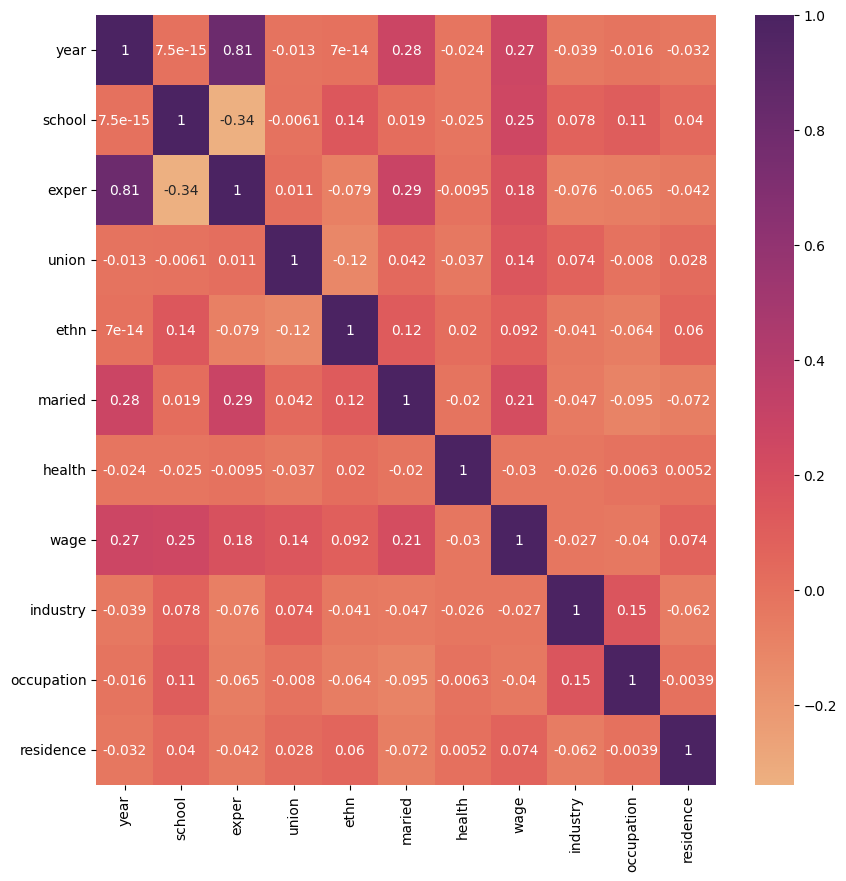

In [ ]:
# checking the pearson correlation in the data
correlation = df.corr('pearson')
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='flare')

<Axes: >

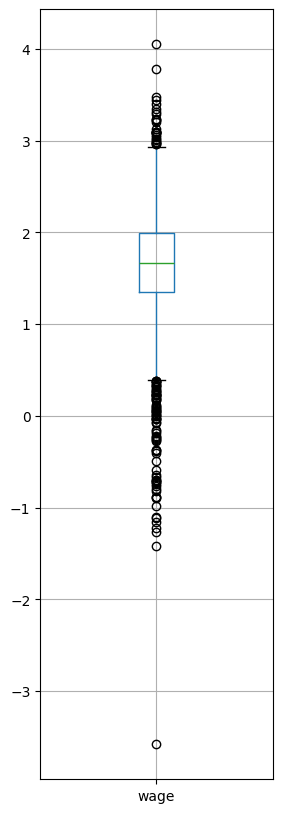

In [76]:
df.boxplot(column="wage", figsize=(3,10))

#### Wage Column has alot of outliers and some negative values. We will remove the negative values and see the correlation again

In [73]:
df1 = df[df['wage'] > 0]

<Axes: >

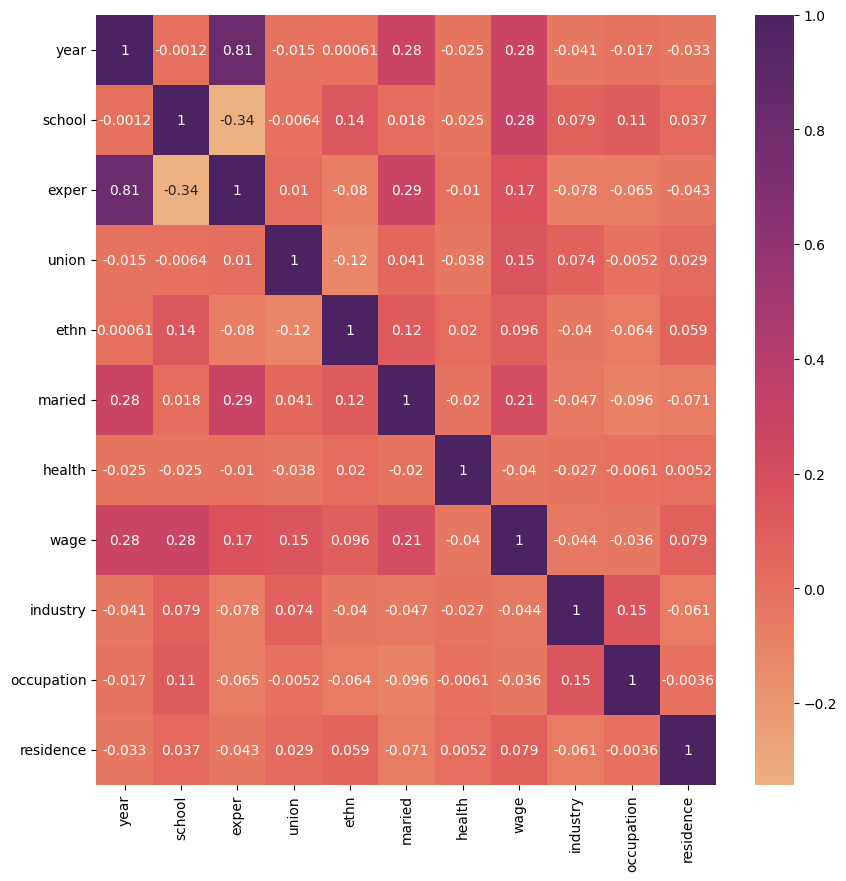

In [77]:
correlation = df1.corr('pearson')
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='flare')

In [47]:
df.head()

,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1980,14,1,0,2,0,0,1.197540,1,8,3.0
1,1981,14,2,1,2,0,0,1.853060,7,8,3.0
2,1982,14,3,0,2,0,0,1.344462,1,8,3.0
3,1983,14,4,0,2,0,0,1.433213,1,8,3.0
4,1984,14,5,0,2,0,0,1.568125,7,1,3.0
